In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/divvy-trip-2019-all-dataset/all_data.csv


In [8]:
# Load the data
file_path = '/kaggle/input/divvy-trip-2019-all-dataset/all_data.csv'
data = pd.read_csv(file_path)

In [9]:
# Convert 'start_time' and 'end_time' to datetime
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

# Removing commas from value in'tripduration'
data['tripduration'] = data['tripduration'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)

# Convert 'tripduration' to float
data['tripduration'] = data['tripduration'].astype(float)

# Convert 'ride_length' to timedelta
data['ride_length'] = pd.to_timedelta(data['ride_length'])

# Extracting the minutes from the 'ride_length' column
data['ride_length'] = data['ride_length'].dt.total_seconds() / 60

# Convert 'ride_length' to integer
data['ride_length'] = data['ride_length'].astype(int)

# Convert 'usertype' and 'gender' to category
data['usertype'] = data['usertype'].astype('category')
data['gender'] = data['gender'].astype('category')

### Visualize Casual and Annual Membership Distribution

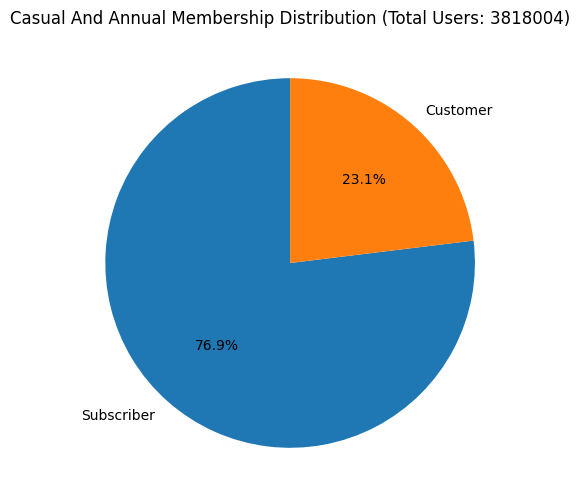

In [10]:
# Count the number of casual and annual members
user_type_counts = data['usertype'].value_counts()

# Create pie chart with total number of users
plt.figure(figsize=(10, 6))
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Casual And Annual Membership Distribution (Total Users: {})'.format(len(data)))
plt.show()

## Pattern of Association with the Subscription:

### Customer Loyalty:
The high subscriber ratio indicates a solid loyal customer base. This could be the result of a positive service experience, exclusive subscriber benefits, or successful customer retention strategies

### Subscriber Growth Potential:
Despite customer dominance, companies can explore opportunities to attract more casual users and convert them into customers. Special marketing campaigns or exclusive offers for new customers can be effective

### Behavior Analysis:
It is important to understand the journet behavior of typical users compered to subscribers. This can help personalize the offering, making the service more attractive to different user segments

### Enhanced Benefits for Subscribers:
By understanding subscirbers preferences and usage patterns, can inform the company about the optimization of the benefits provided aimed at maintaining and attracting subscribers

### Visualize Relationship between Gender and User Type

/tmp/ipykernel_33/736421759.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_user_count = data.groupby(['gender', 'usertype']).size().reset_index(name='count')
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


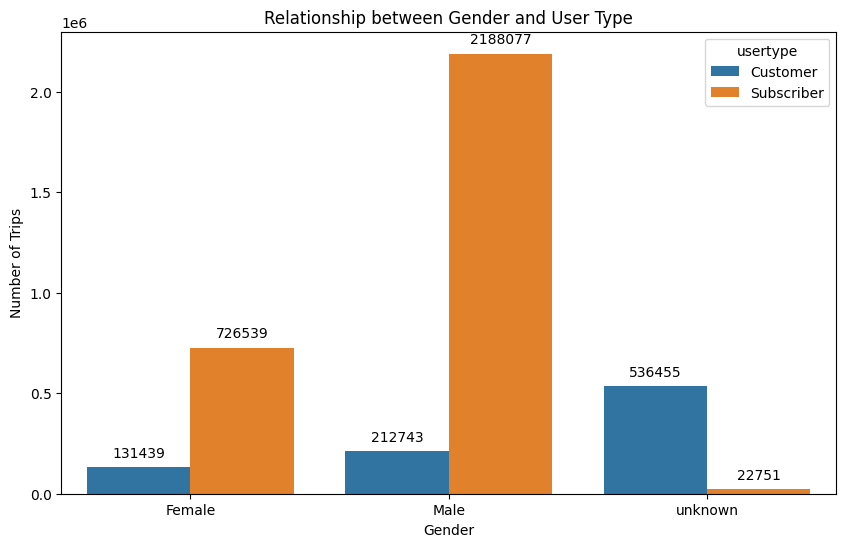

In [11]:
# Trip count for each user type and gender
gender_user_count = data.groupby(['gender', 'usertype']).size().reset_index(name='count')

# Create barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='gender', y='count', hue='usertype', data=gender_user_count)

# Add labels to bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10),
                    textcoords = 'offset points')

plt.title('Relationship between Gender and User Type')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')

# Save as images
plt.savefig('gender_x_user.png')

plt.show()

## Gender Distribution Analysis
* Of the 3.818.004 trips made by member users represent 76.9 of the trips.
* Male users are responsible for 2.188.077 (74.5%) of trips taken by members.
* While female users are responsible for 726.539 (24.7%) trips.

### Visualize Distribution of Trips Duration by Type of Users (Less than 50 minutes)

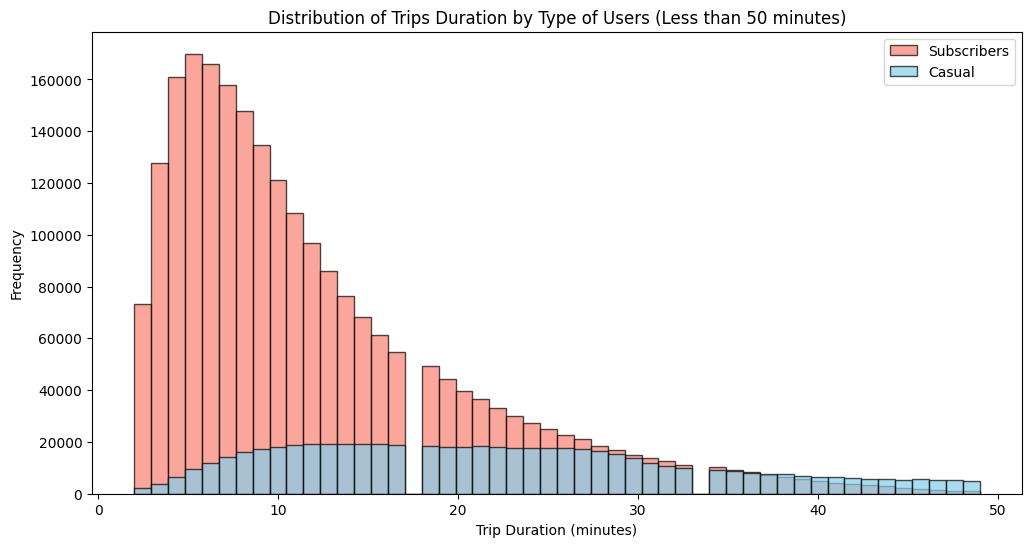

In [12]:
# Filter data for trips lasting between 1 and 50 minutes
filtered_data = data[(data['ride_length'] > 1) & (data['ride_length'] < 50)]

# Create data subsets for casual users and subscribers
casual_data = filtered_data[filtered_data['usertype'] == 'Customer']
subscriber_data = filtered_data[filtered_data['usertype'] == 'Subscriber']

# Configure layout graphics
plt.figure(figsize=(12, 6))

# Plot histogram for subscriber
plt.hist(subscriber_data['ride_length'], bins=50, color='salmon', edgecolor='black', alpha=0.7, label='Subscribers')

# Plot histogram for casual
plt.hist(casual_data['ride_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Casual')

# Title plot
plt.title('Distribution of Trips Duration by Type of Users (Less than 50 minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Travel Distribution Analysis
* Short Duration (Less than 20 minutes) : Most trips last less than 20 minutes. This may indicates that the majority of users use bicycle for short trips, such as trips between home and works, quick shopping, or other short-term activities.
* Variety in Durations: The fact that there is significant variation in trip duration suggests that bicycles are used for different perposes. Some journeys may be very short, while other may be longer, meeting different mobility needs.
* Equality in Usage after 30 minutes: It was noted that, after 30 minutes, the number of users of users become similar. This may indicate that some users choose to use bicycle for longer periods, such as use for longer trips or people who like cycling

### Visualize Usage Patterns Throughout the Day

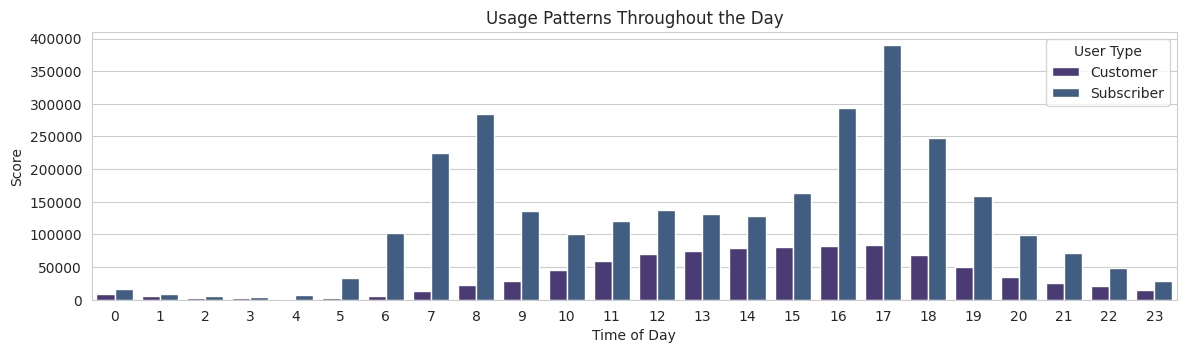

In [13]:
# Create 'hour' column to represent the time of day
data['hour'] = data['start_time'].dt.hour

# Configure visual
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Plot usage patterns throughout the day
plt.figure(figsize=(14, 16))
plt.subplot(4, 1, 1)
sns.countplot(x='hour', data=data, hue='usertype')
plt.title('Usage Patterns Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Score')
plt.legend(title='User Type')

## Analysis of Usage Patterns
* Both groups have an increase in use in the morning, indicating likely trips to work or other daytime activities.
* Casual cyclist show a tendency to peak usage during the afternoon and early evening, indicating possible recreational use.
* Annual members maintain a more stabel distribution throughout the day
* Casual cyclist tend to show greater variations during the day, suggesting more flexible and recretional use.
* Annual members maintain more stable patterns, indicating possible reguler displacments.

### Visualize Most Popular Home Stations for Annual and Casual Members

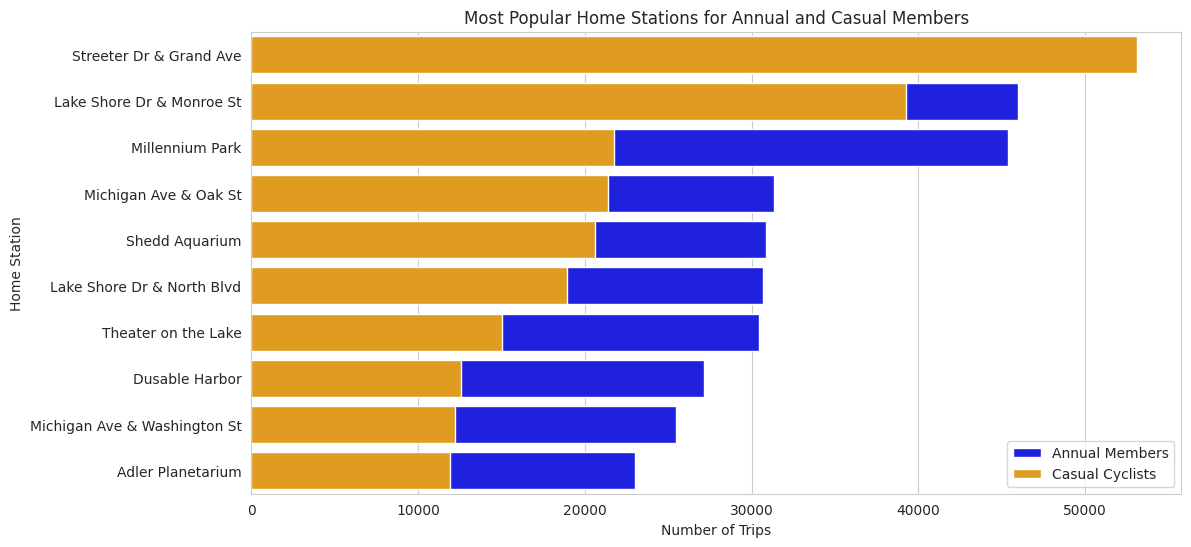

In [14]:
# Most Popular Stations for Annual Members
top_start_stations_annual = data[data['usertype'] == 'Subscriber']['from_station_name'].value_counts().head(10)

# Most popular Stations for Casual Members
top_start_stations_casual = data[data['usertype'] == 'Customer']['from_station_name'].value_counts().head(10)

# View the most popular stations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_start_stations_annual.values, y=top_start_stations_annual.index, color='blue', label='Annual Members')
sns.barplot(x=top_start_stations_casual.values, y=top_start_stations_casual.index, color='orange', label='Casual Cyclists')
plt.title('Most Popular Home Stations for Annual and Casual Members')
plt.xlabel('Number of Trips')
plt.ylabel('Home Station')
plt.legend()
plt.show()


## Analysis of the most popular stations for both types of users

Streeter Dr & Grand Ave:
* This station may be located in area with high user demand, such as a residental, commercial or tourist region.
* Proximity to local attractions or leisure areas can make it a popular choice for starting trips.

Lake Shore Dr & Monore St.
* The lakeside locations could make this station a convenient option for user looking for start trips along the waterfront
* Nearby parks and tourist attractions, this could add to its popularity this season

Milennium Park:
* As an iconic and central location, Milennium Park attracts both residents and visitors
* The station near the park can be a convenient choice for those who want to explore the area or use bicycles for leisure

------------------------------------------------------------------------------------

## Possible Implications for the Company:
* Strategic Location: The most popular stations are strategically located in high demand areas. The company may consider expanding station presence in similar areas to meet growing demand.
* Tourist Attraction: The existence of a station close to a tourist attraction could be an option to promote partnerships for tourists
* Infrastructure and Maintenance: Given the popularity for these stations, it is crucial to ensure good infrastructure and maintenance to offer positive experience to users.

### Visualize Top 10 Destinations for Annual and Casual Members

/tmp/ipykernel_33/1982258719.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  destination_year = data.groupby(['to_station_name', 'usertype']).size().reset_index(name='count')


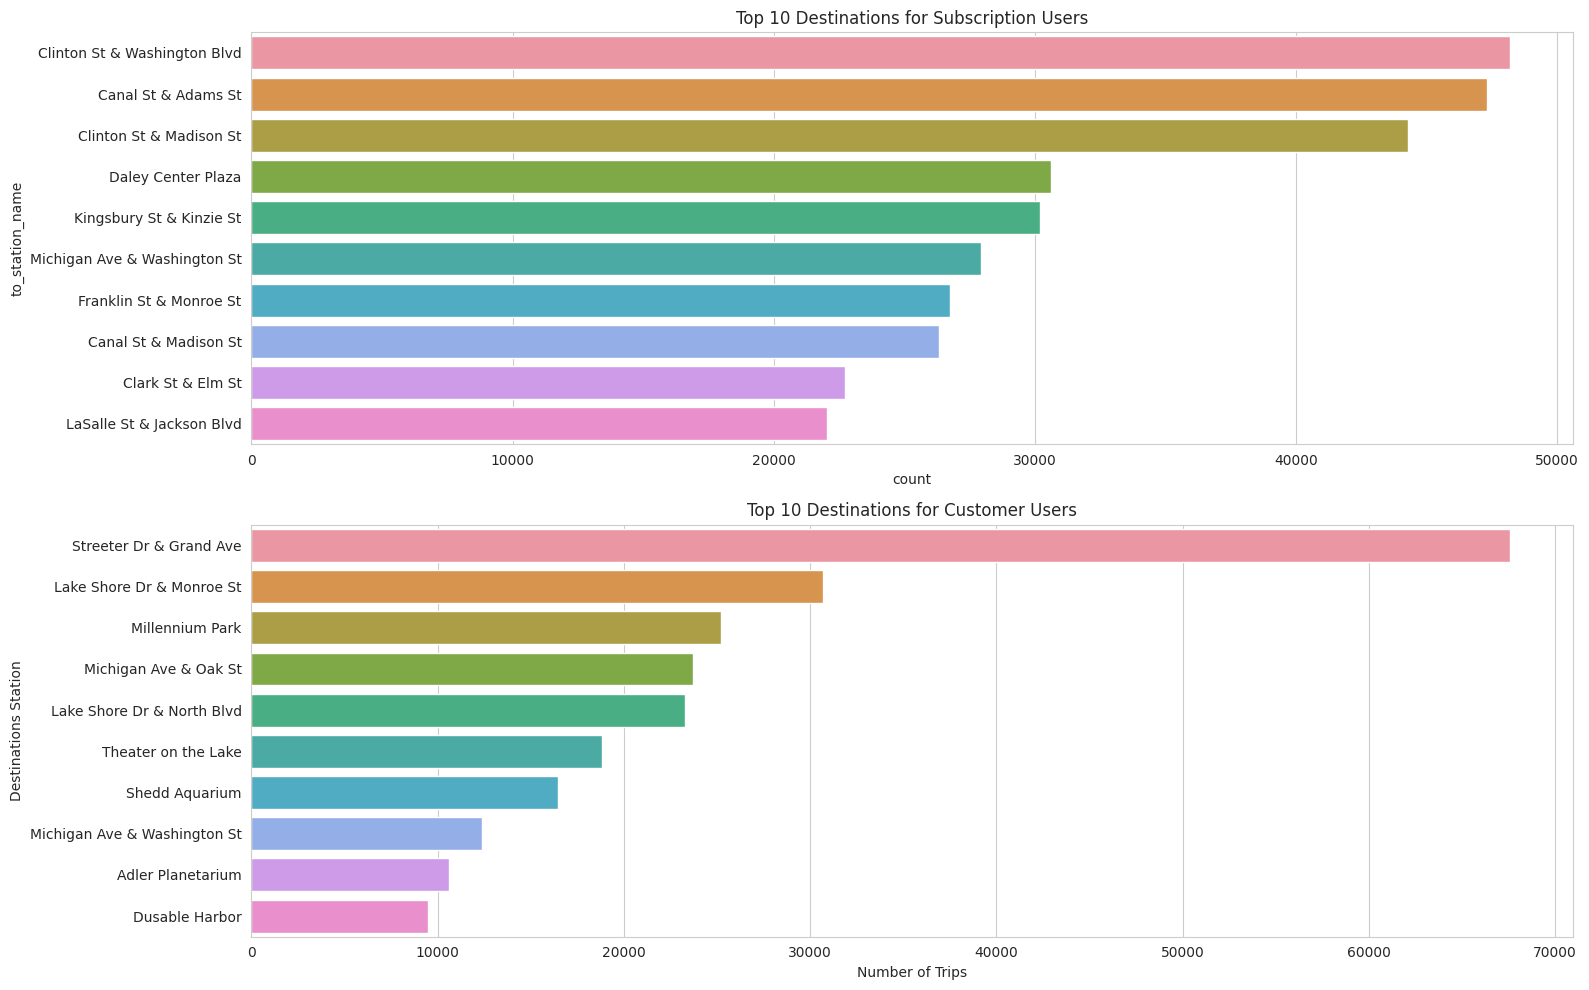

In [15]:
# Calculate trip count for each destination by user type
destination_year = data.groupby(['to_station_name', 'usertype']).size().reset_index(name='count')

# Filter the 10 most popular destinations for each type of user
top_destinations_subscriber_year = destination_year[destination_year['usertype'] == 'Subscriber'].nlargest(10, 'count')
top_destinations_customer_year = destination_year[destination_year['usertype'] == 'Customer'].nlargest(10, 'count')

# Create separate bar charts for each user type
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='count', y='to_station_name', data=top_destinations_subscriber_year, order=top_destinations_subscriber_year['to_station_name'])
plt.title('Top 10 Destinations for Subscription Users')

plt.subplot(2, 1, 2)
sns.barplot(x='count', y='to_station_name', data=top_destinations_customer_year,order=top_destinations_customer_year['to_station_name'])
plt.title('Top 10 Destinations for Customer Users')

# Additional tweaks for readability
plt.xlabel('Number of Trips')
plt.ylabel('Destinations Station')
plt.tight_layout()

# Save as images
plt.savefig('top_destinations_by_user_year')
plt.show()

## The Most Popular Destinations

### Subscribers:

Clinton St & Washington Blvd:
* This could be a residential or commercial area popular with subscribers.
* Proximity to public transport stations or point of interest can contribute to popularity

Canal St & Adams St:
* Located in a commercial or business area, this station may be frequently used by subscribers to traveling to work or meeting

Clinton St & Masidon St:
* Similiar to the first station, this area can be residential or commercial, making it conveinent for subscribers.

### Common Users:

Streeter Dr & Grand Ave:
* This station is also one of the most popular home stations for both type of users.
* Strategic location close to tourist attraction or leisure areas can attract common users.

Lake Shore Dr & Monroe St:
* Located on the lakefront, this destination may be attractive to ordinary users who want to enjoy walks along the shore.

Milennium Park:
* Millennium Park is an iconic place, so it can be an attraction for tourists or local residents

------------------------------------------------------------------------------------

### Possible Implications for the Company:
* Meeting Deverse Needs: The company can adjust marketing strategies and promotions based on popular destinations to meet the spesific needs of subscribers and common users.
* Partnerships with Local Establishments: Collaborations with commercial establishments close to popular destinations can furthur encourage the use of the service.
* Station Network Expansion: When there is a famous tourist destination, perhaps the company can add or expand the station network to get lots of users

### Visualize Usage Pattern per Month

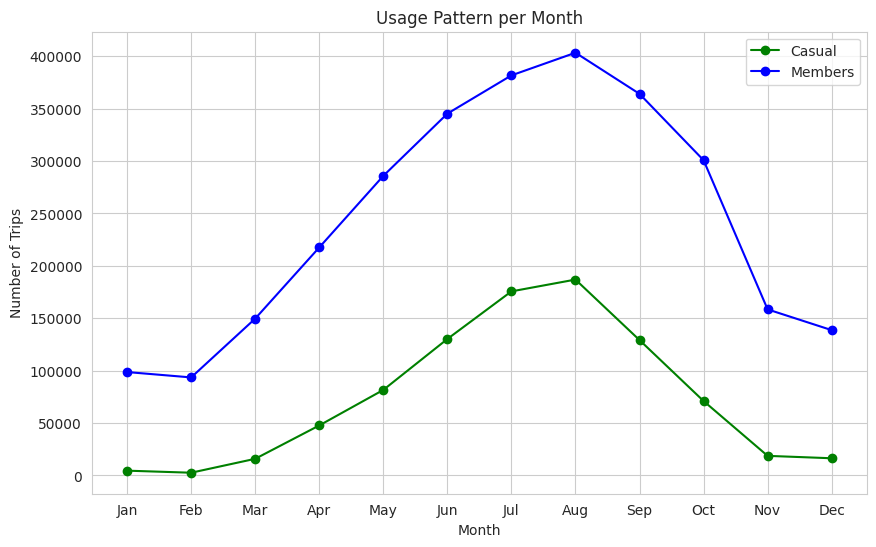

In [18]:
# Extract the motn from the 'start_time' column
data['start_month'] = data['start_time'].dt.month

# Create separate DataFrame for casual users and members
casual_data = data[data['usertype'] == 'Customer']
member_data = data[data['usertype'] == 'Subscriber']

# Count the number of trips per month for casual users and members
casual_monthly_counts = casual_data['start_month'].value_counts().sort_index()
member_monthly_counts = member_data['start_month'].value_counts().sort_index()

# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(casual_monthly_counts.index, casual_monthly_counts.values, color='g', marker='o', label='Casual')
plt.plot(member_monthly_counts.index, member_monthly_counts.values, color='b', marker='o', label='Members')
plt.title('Usage Pattern per Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(casual_monthly_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

## Usage Pattern Throughout the Year

### Weakest Months (January, February, November, December):
Lower demand during the winter months. Possible influence of adverse weather conditions, such as intense cold.
### Gradual Increase from March:
There was a recovery in usage from March onwards. Possible coincidence with the beginning of spring, suggesting greater willingness among users fro outdoor activities.
### Peak Usage between June and September:
### **The summber months see the highest levels of usage. More favorable climate encourages the use bicycles for leisure and commuting**
### Implications for the Company:
Based on the analysis of the usage pattern throughout the year, some important implications for the company can be considered.
### Operational Planning:
During weaker months, the company can optimize, considering lowe demand. In peak months, temporary expansion strategies, such as increasing the bicycle fleet or pickup/drop-off points, can be implemented.
### Segmenteed Marketing Campaigns:
The company can develop segmented marketing campaigns, promoting the service more intensely in the months that historically show greater demand. Special offer or seasonal discount can encourage usage during slower periods
### Preventative Maintenance:
During the months of lower use, it mayu be an oppurtunity to carry out preventative maintenance on the bicycle fleer. This ensures the bikes are in optimal condition when demand increases.
### Community Engagement:
Community engagment strategies can be developed, such as local events or partnerships, to maintain awareness of the service year-round.